# 📊 Aula sobre Distribuições Contínuas

## 🧠 Introdução

As distribuições contínuas representam variáveis aleatórias que podem assumir qualquer valor em um intervalo contínuo. 📐
Diferentemente das distribuições discretas, as contínuas são descritas por funções de densidade de probabilidade (PDF - Probability Density Function) em vez de funções de massa de probabilidade. 🌊



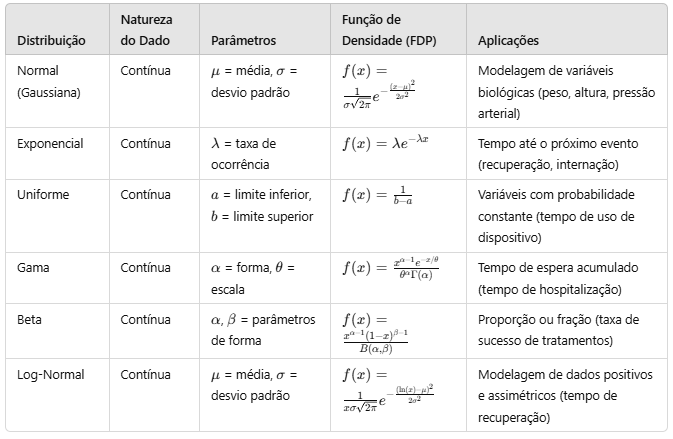

## 📈Distribuição Normal (Gaussiana)

#### 📖 Descrição

A distribuição normal, também conhecida como distribuição gaussiana, é uma das distribuições contínuas mais importantes na estatística. É amplamente utilizada para modelar fenômenos naturais e é caracterizada por sua forma simétrica e em forma de sino.



No capítulo sobre probabilidade, vimos que a distribuição binomial pode ser usada para resolver problemas como "Se uma moeda honesta for lançada 100 vezes, qual é a probabilidade de obter 60 ou mais caras?" Portanto, para resolver esse problema, você calcula a probabilidade de 60 caras, depois a probabilidade de 61 caras, 62 caras, etc., e **soma todas essas probabilidades**. Imagine quanto tempo deve ter levado para calcular probabilidades binomiais antes do advento das calculadoras e computadores.

Abraham de Moivre, um estatístico do século XVIII e **consultor de jogadores**, era frequentemente chamado para fazer esses cálculos longos. de Moivre notou que quando o número de eventos (lançamentos de moedas) aumentava, o formato da distribuição binomial se aproximava de uma curva muito suave.

In [ ]:
from scipy.stats import binom, norm
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

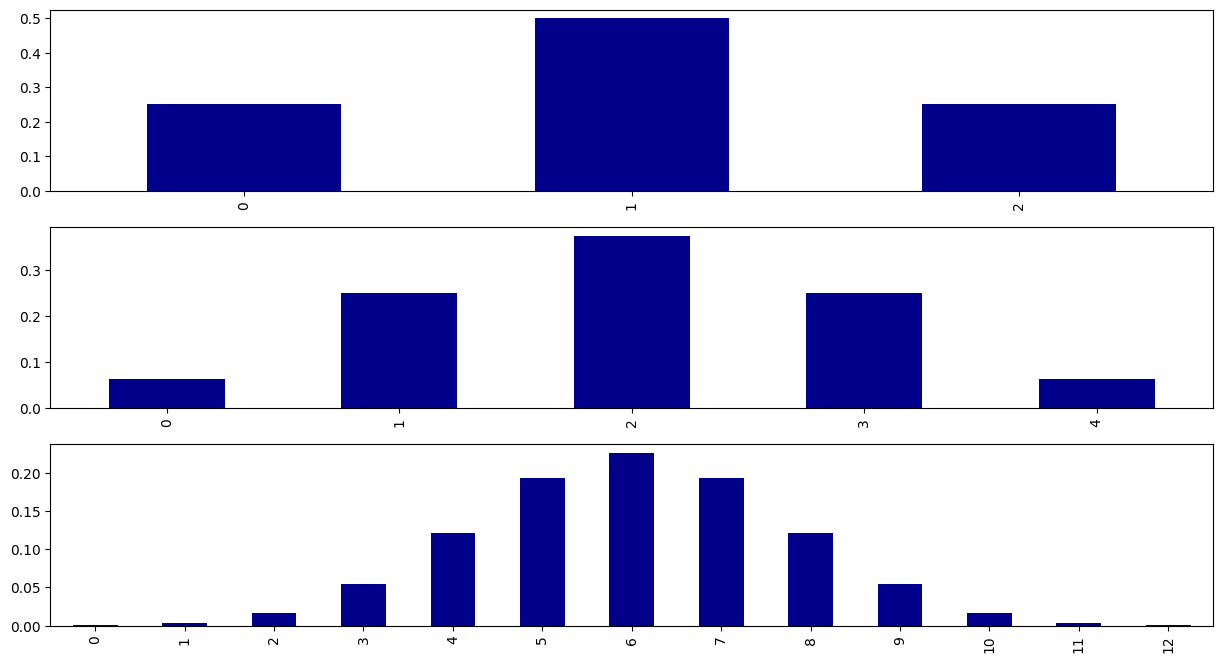

In [ ]:
N = [2, 4, 12]

fig, axes = plt.subplots(nrows=len(N), ncols=1)
for i, n in enumerate(N):
    _ = pd.Series([binom.pmf(x, n, p=0.5) for x in range(n+1)],
                  index=range(n+1)).plot.bar(color='darkblue',
                                             ax=axes[i],
                                             figsize=(15, 8))

de Moivre raciocinou que se ele pudesse encontrar uma expressão matemática para essa curva, ele seria capaz de resolver problemas como encontrar a probabilidade de 60 ou mais caras em 100 lançamentos de moeda muito mais facilmente. Foi exatamente isso que ele fez, e a curva que ele descobriu agora é chamada de "curva normal".

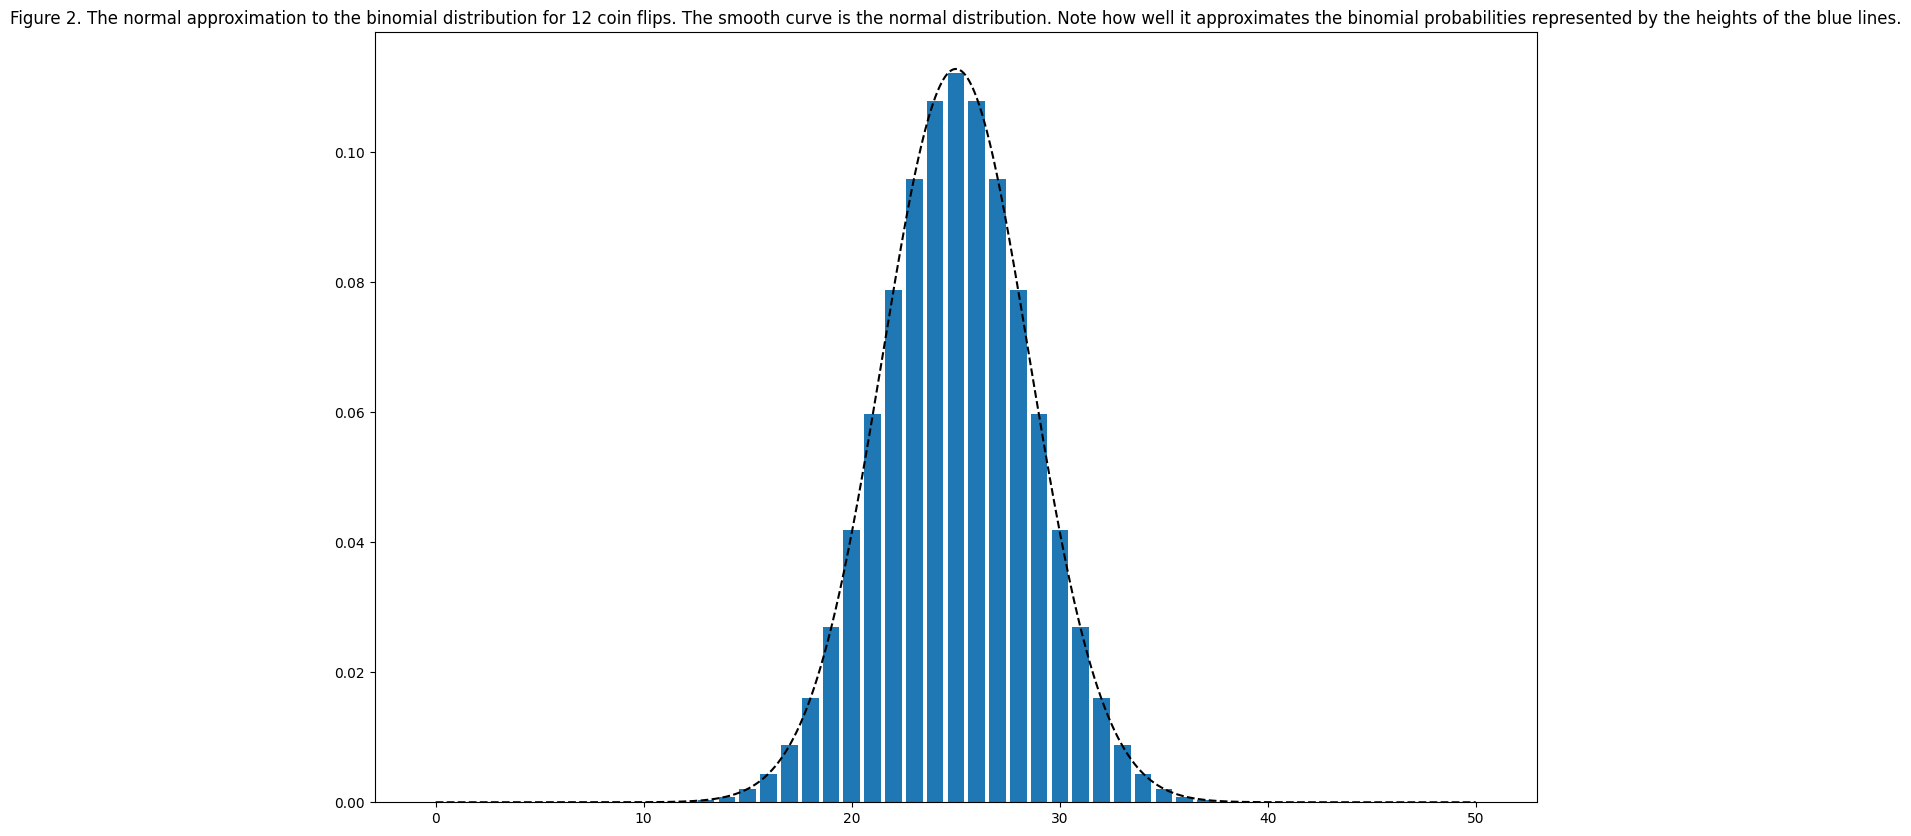

In [ ]:
N = 50
p = 0.5

fig, ax = plt.subplots(1, figsize=(15, 10))
title = ('Figure 2. The normal approximation to the binomial distribution '
         'for 12 coin flips. The smooth curve is the normal distribution. '
         'Note how well it approximates the binomial probabilities '
         'represented by the heights of the blue lines.')
plt.title(title)
x_axis = np.arange(0, N, 0.01)
ax.bar(x_axis, pd.Series(binom.pmf(x_axis, N, p)))
ax.plot(x_axis, pd.Series(norm.pdf(x_axis, N*p, (N*p*(1-p))**0.5)), 'k--')
plt.show()

A importância da curva normal decorre principalmente do fato de que as distribuições de muitos fenômenos naturais são pelo menos aproximadamente distribuídas normalmente.

Uma das primeiras aplicações da distribuição normal foi na análise de erros de medição feitos em observações astronômicas, erros que ocorreram por causa de instrumentos imperfeitos e observadores imperfeitos. Galileu, no século XVII, observou que esses erros eram simétricos e que pequenos erros ocorriam com mais frequência do que grandes erros.

Isso levou a várias distribuições hipotéticas de erros, mas foi somente no início do século XIX que se descobriu que esses erros seguiam uma distribuição normal. Independentemente, os matemáticos Adrain em 1808 e Gauss em 1809 desenvolveram a fórmula para a distribuição normal e mostraram que os erros eram bem ajustados por essa distribuição.

Essa mesma distribuição foi descoberta por Laplace em 1778, quando ele derivou o extremamente importante teorema do limite central, o tópico de uma seção posterior deste capítulo. Laplace mostrou que mesmo que uma distribuição não seja normalmente distribuída, as médias de amostras repetidas da distribuição seriam quase normalmente distribuídas, e que quanto maior o tamanho da amostra, mais próxima a distribuição das médias seria de uma distribuição normal.

A maioria dos procedimentos estatísticos para testar diferenças entre médias assume distribuições normais. Como a distribuição das médias é muito próxima do normal, esses testes funcionam bem mesmo que a distribuição original seja apenas aproximadamente normal.

Quételet foi o primeiro a aplicar a distribuição normal às características humanas. Ele observou que características como altura, peso e força eram normalmente distribuídas.

####🔢 Função densidade de Probabilidade (FDP)

A distribuição normal é definida por dois parâmetros:

📏 Média (
𝜇
μ): define o centro da distribuição.

📐 Desvio Padrão (
𝜎
σ): define a dispersão dos dados em torno da média.

A função de densidade de probabilidade (PDF - Probability Density Function) da distribuição normal é dada por:

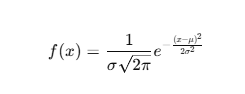

**Exemplo:** Suponha que os níveis de colesterol total em uma população adulta sigam uma distribuição normal com:
Média (μ) = 200 mg/dL
Desvio Padrão (σ) = 30 mg/dL

Podemos usar a FDP da distribuição normal para responder perguntas como:

Qual é a probabilidade de uma pessoa ter colesterol entre 170 e 230 mg/dL?

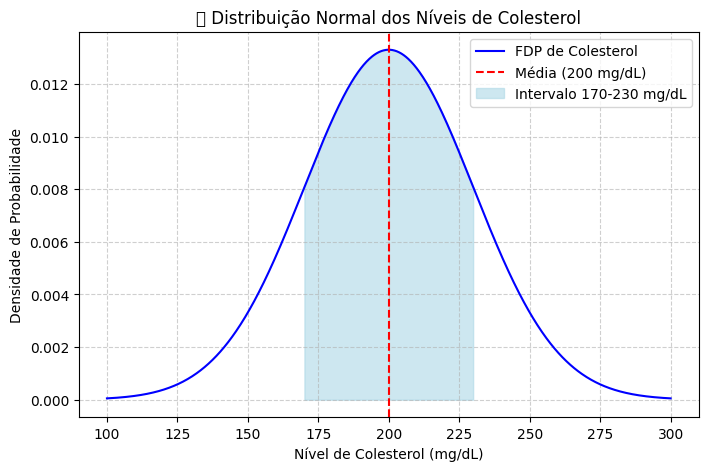

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros da distribuição
mu = 200  # Média
sigma = 30  # Desvio padrão
x = np.linspace(100, 300, 1000)  # Intervalo de colesterol

# Cálculo da PDF (Função Densidade de Probabilidade)
pdf = norm.pdf(x, mu, sigma)

# Gráfico da FDP
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label="FDP de Colesterol", color='blue')
plt.title("📈 Distribuição Normal dos Níveis de Colesterol")
plt.xlabel("Nível de Colesterol (mg/dL)")
plt.ylabel("Densidade de Probabilidade")
plt.axvline(mu, color='red', linestyle='--', label="Média (200 mg/dL)")
plt.fill_between(x, pdf, where=((x >= 170) & (x <= 230)), color='lightblue', alpha=0.6, label="Intervalo 170-230 mg/dL")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


A área sombreada no gráfico representa a probabilidade de um indivíduo ter colesterol entre 170 e 230 mg/dL.

A curva mostra que a maior densidade de probabilidade está próxima da média (200 mg/dL), indicando que é mais comum encontrar pessoas com colesterol nessa faixa.

#### 📝 Propriedades da Distribuição Normal

* Simetria: A curva é simétrica em torno da média (
𝜇).

* Área Total Igual a 1: A área sob a curva da PDF é sempre igual a 1.

* Moda, Média e Mediana Coincidem: Para a distribuição normal, esses valores são iguais.

* Forma de Sino: A curva tem um formato de sino devido à sua simetria.

* Regra Empírica (68-95-99.7):

68% dos valores estão dentro de 1 desvio padrão da média.

95% dos valores estão dentro de 2 desvios padrão.

99,7% dos valores estão dentro de 3 desvios padrão.



OBS: Para todas as distribuições normais, **95% da área está dentro de 1,96 desvios padrão da média**. Para aproximações rápidas, às vezes é útil arredondar e usar 2 em vez de 1,96 como o número de desvios padrão que você precisa estender da média para incluir 95% da área.

In [ ]:
def compare_normal_curves(params=[(50, 10), (100, 20), (75, 10), (75, 20)],
                          areas=[.68, .95, .997]):
    '''Compare normal curves'''
    cmap = plt.get_cmap('Reds_r')
    fig, ax = plt.subplots(len(params), 2, sharex=True, sharey='col',
                           figsize=(18, 10))
    xlbs, xubs = zip(*[(param[0] - 4 * param[1], param[0] + 4 * param[1])
                       for param in params])
    xlb, xub = min(xlbs), max(xubs)
    x_axis = np.arange(xlb, xub, (xub-xlb)/10000)
    for i, (mean, std) in enumerate(params):
        n_pdf = norm.pdf(x_axis, mean, std)
        label = 'mean: {}, std: {}'.format(mean, std)
        ax[i, 0].plot(x_axis, n_pdf, 'r', label=label, linewidth=3)
        ax[i, 0].legend(loc='best')
        n_cdf = norm.cdf(x_axis, mean, std)
        ax[i, 1].plot(x_axis, n_cdf, 'r', linewidth=3)
        colors = iter(cmap(np.linspace(0, 1, len(areas))))
        for area in sorted(areas, reverse=True):
            xlb, xub = (round(x) for x in norm(mean, std).interval(area))
            color = next(colors)
            where = np.logical_and(x_axis > xlb, x_axis < xub)
            ax[i, 0].fill_between(x_axis, n_pdf, 0, where=where,
                                  facecolor=color, interpolate=True)
            ax[i, 1].fill_between(x_axis, n_cdf, 0, where=where,
                                  facecolor=color, interpolate=True,
                                  label='area: {}'.format(area))
            ax[i, 1].legend(loc='best')
    plt.show()

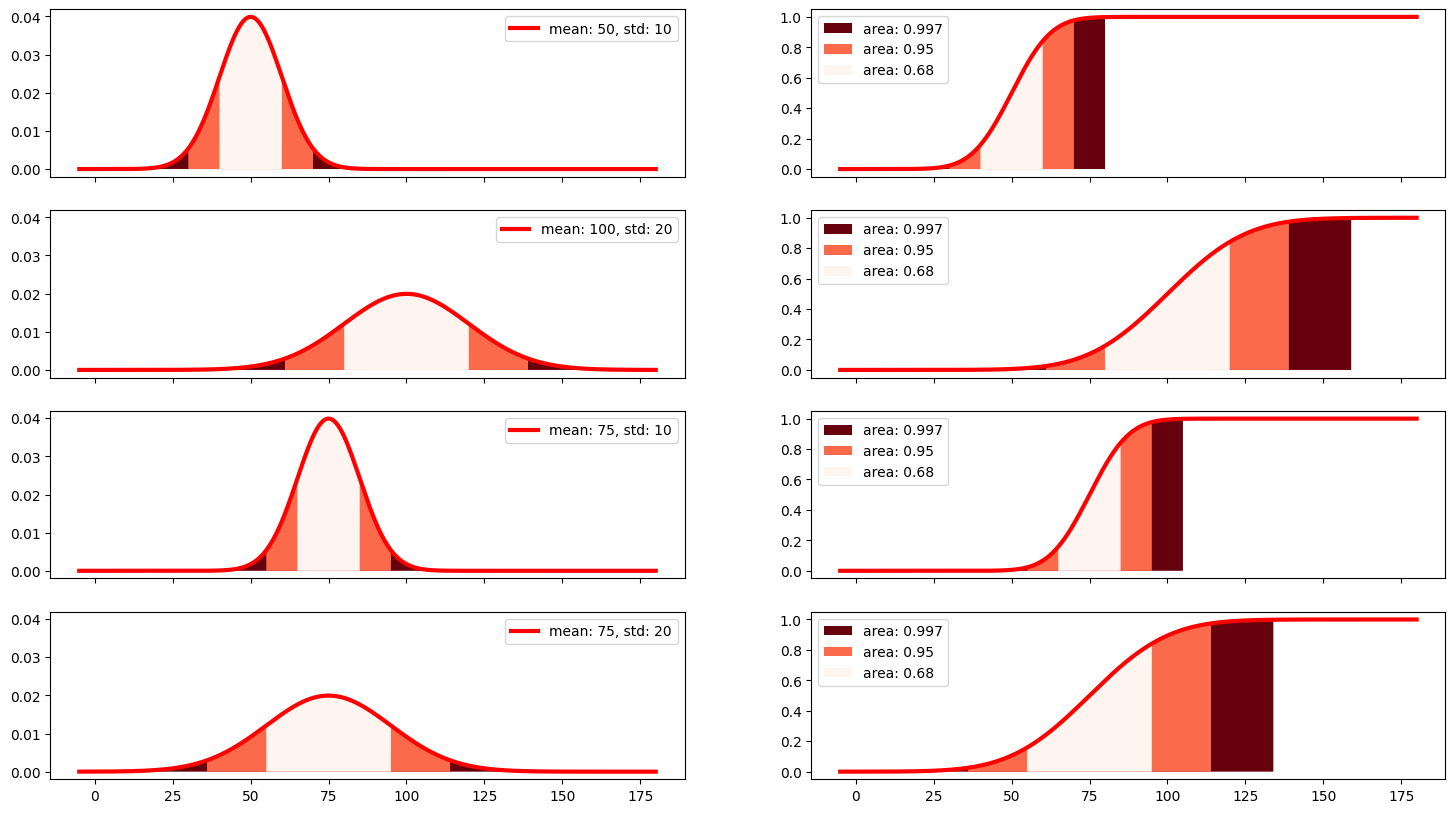

In [ ]:
compare_normal_curves()

#### 📊 Gráfico da Função Densidade de Probabilidade (FDP)

Vamos plotar o gráfico da distribuição normal padrão (
𝜇
=
0,
𝜎
=
1):

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


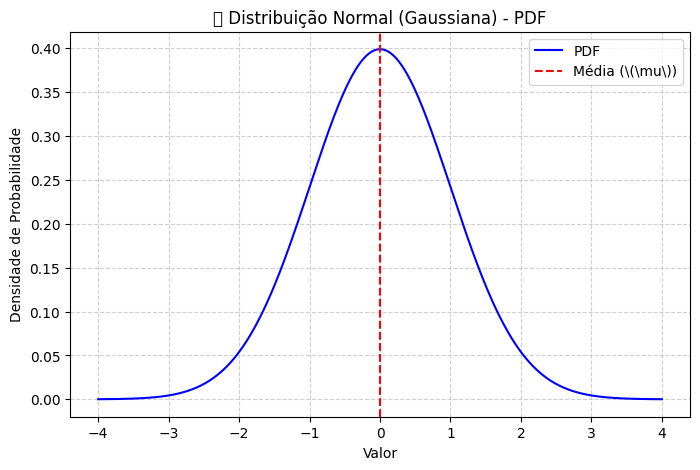

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Configurações da distribuição normal padrão
x = np.linspace(-4, 4, 1000)
mu, sigma = 0, 1
pdf = norm.pdf(x, mu, sigma)

# Gráfico da PDF
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label="PDF", color='blue')
plt.title("📈 Distribuição Normal (Gaussiana) - PDF")
plt.xlabel("Valor")
plt.ylabel("Densidade de Probabilidade")
plt.axvline(mu, color='red', linestyle='--', label="Média (\(\mu\))")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


####📈 Função de Distribuição Cumulativa (CDF)

A Função de Distribuição Cumulativa (CDF - Cumulative Distribution Function) fornece a probabilidade acumulada até um ponto
𝑥:

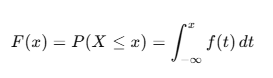

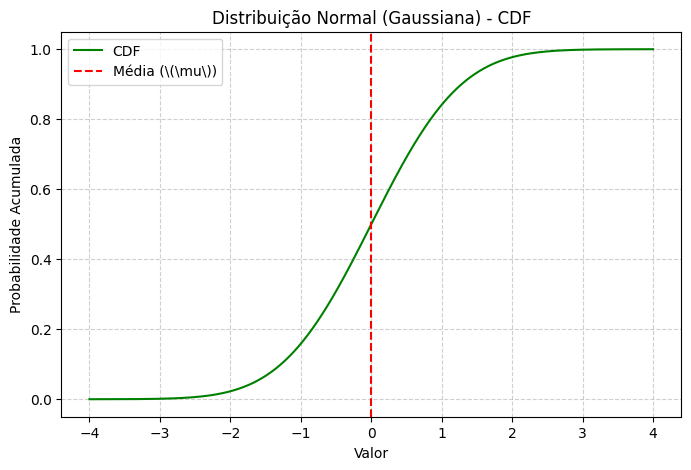

In [ ]:
# Gráfico da CDF
cdf = norm.cdf(x, mu, sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, cdf, label="CDF", color='green')
plt.title("Distribuição Normal (Gaussiana) - CDF")
plt.xlabel("Valor")
plt.ylabel("Probabilidade Acumulada")
plt.axvline(mu, color='red', linestyle='--', label="Média (\(\mu\))")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


**Exemplo:** Suponha que os níveis de colesterol total em uma população adulta sigam uma distribuição normal com: Média (μ) = 200 mg/dL e Desvio Padrão (σ) = 30 mg/dL

Vamos responder à seguinte pergunta:

Qual é a probabilidade de um adulto ter colesterol total menor que 220 mg/dL?



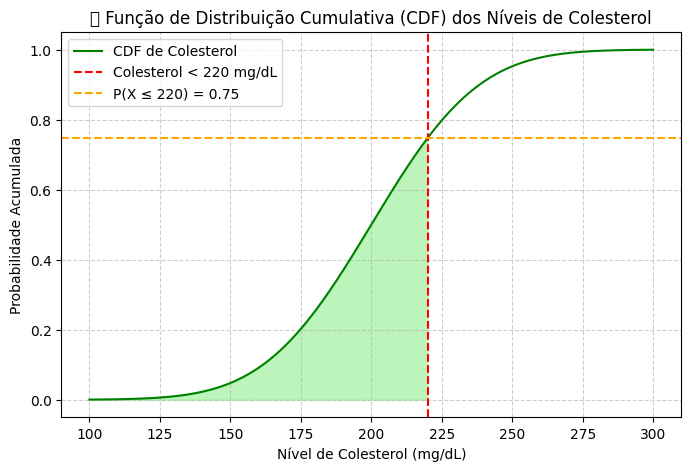

✅ A probabilidade de um adulto ter colesterol menor que 220 mg/dL é de aproximadamente 74.75%.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros da distribuição
mu = 200  # Média
sigma = 30  # Desvio padrão
x = np.linspace(100, 300, 1000)  # Intervalo de colesterol

# Cálculo da CDF (Função de Distribuição Cumulativa)
cdf = norm.cdf(x, mu, sigma)

# Probabilidade acumulada para colesterol < 220 mg/dL
prob_acumulada = norm.cdf(220, mu, sigma)

# Gráfico da CDF
plt.figure(figsize=(8, 5))
plt.plot(x, cdf, label="CDF de Colesterol", color='green')
plt.title("📈 Função de Distribuição Cumulativa (CDF) dos Níveis de Colesterol")
plt.xlabel("Nível de Colesterol (mg/dL)")
plt.ylabel("Probabilidade Acumulada")
plt.axvline(220, color='red', linestyle='--', label="Colesterol < 220 mg/dL")
plt.axhline(prob_acumulada, color='orange', linestyle='--', label=f"P(X ≤ 220) = {prob_acumulada:.2f}")
plt.fill_between(x, cdf, where=(x <= 220), color='lightgreen', alpha=0.6)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ A probabilidade de um adulto ter colesterol menor que 220 mg/dL é de aproximadamente {prob_acumulada:.2%}.")


A CDF mostra a probabilidade acumulada até um valor específico.
Neste exemplo, a probabilidade de um adulto ter colesterol total menor que 220 mg/dL é aproximadamente 74%.

####🛑 Função de Sobrevivência (SF)

A Função de Sobrevivência (SF - Survival Function) representa a probabilidade de a variável assumir um valor maior que
𝑥
x:

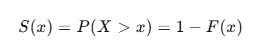

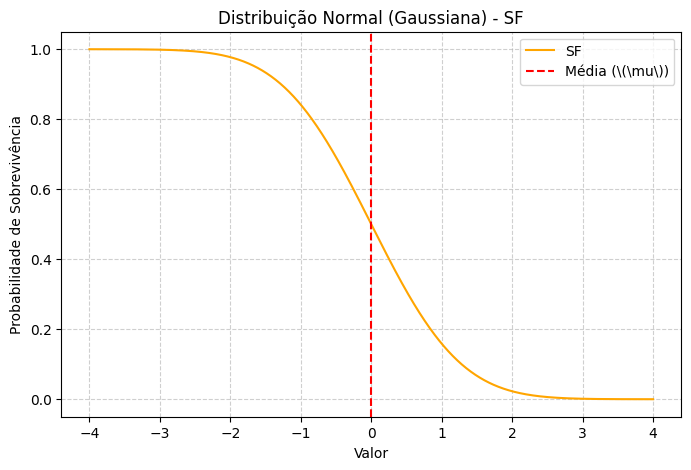

In [ ]:
# Gráfico da SF
sf = norm.sf(x, mu, sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, sf, label="SF", color='orange')
plt.title("Distribuição Normal (Gaussiana) - SF")
plt.xlabel("Valor")
plt.ylabel("Probabilidade de Sobrevivência")
plt.axvline(mu, color='red', linestyle='--', label="Média (\(\mu\))")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


**Exemplo:** Considerando a população anterior, qual é a probabilidade de um adulto ter colesterol maior que 240 mg/dL?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


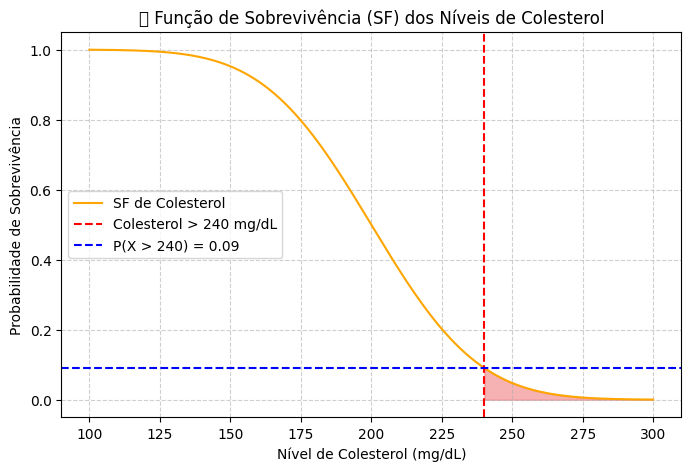

✅ A probabilidade de um adulto ter colesterol maior que 240 mg/dL é de aproximadamente 9.12%.


In [ ]:
# Cálculo da SF (Função de Sobrevivência)
sf = norm.sf(x, mu, sigma)

# Probabilidade de colesterol maior que 240 mg/dL
prob_sobrevivencia = norm.sf(240, mu, sigma)

# Gráfico da SF
plt.figure(figsize=(8, 5))
plt.plot(x, sf, label="SF de Colesterol", color='orange')
plt.title("🚀 Função de Sobrevivência (SF) dos Níveis de Colesterol")
plt.xlabel("Nível de Colesterol (mg/dL)")
plt.ylabel("Probabilidade de Sobrevivência")
plt.axvline(240, color='red', linestyle='--', label="Colesterol > 240 mg/dL")
plt.axhline(prob_sobrevivencia, color='blue', linestyle='--', label=f"P(X > 240) = {prob_sobrevivencia:.2f}")
plt.fill_between(x, sf, where=(x >= 240), color='lightcoral', alpha=0.6)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ A probabilidade de um adulto ter colesterol maior que 240 mg/dL é de aproximadamente {prob_sobrevivencia:.2%}.")


## ⏳ Distribuição Exponencial

#### 📖 Descrição

A distribuição exponencial é amplamente utilizada na estatística e na área da saúde para modelar o tempo até a ocorrência de um evento.
Ela é comumente usada para representar o tempo de vida de dispositivos eletrônicos, o tempo de espera entre eventos em um processo de Poisson ou o tempo até a ocorrência de um evento de saúde (como tempo até uma recaída ou tempo de internação hospitalar).

A distribuição exponencial possui um único parâmetro
λ, que representa a taxa de ocorrência do evento.
Ela é uma distribuição contínua e assimétrica à direita, com uma cauda longa que decresce exponencialmente.

####🔢 Função densidade de Probabilidade (FDP)

A Função Densidade de Probabilidade (FDP) da distribuição exponencial é dada por:

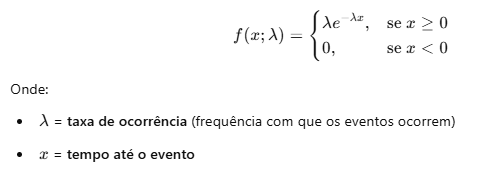

#### 📝 Propriedades da Distribuição Exponencial

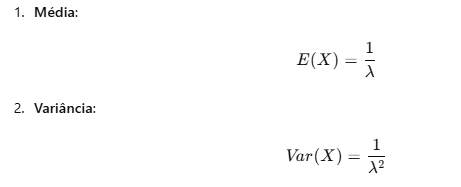

Em uma unidade de pronto atendimento (UPA), o tempo de espera para atendimento médico segue uma distribuição exponencial com taxa de ocorrência
𝜆
=
0,5 pacientes por minuto (ou seja, o tempo médio de espera é de 2 minutos).

In [ ]:
import numpy as np
from scipy.stats import expon

# Parâmetro da distribuição exponencial
lambda_ = 0.5  # Taxa de atendimento (1/2 minutos)

# Média da distribuição exponencial
media = expon.mean(scale=1/lambda_)

# Variância da distribuição exponencial
variancia = expon.var(scale=1/lambda_)

# Desvio padrão da distribuição exponencial
desvio_padrao = expon.std(scale=1/lambda_)

# Obtenção do coeficiente de variação
coef_var = desvio_padrao / media

print(f"📏 Média: {media:.2f} minutos")
print(f"📐 Variância: {variancia:.2f} minutos²")
print(f"📊 Desvio Padrão: {desvio_padrao:.2f} minutos")

📏 Média: 2.00 minutos
📐 Variância: 4.00 minutos²
📊 Desvio Padrão: 2.00 minutos


* A média representa o tempo médio de espera até o próximo evento (atendimento)
* A variância representa a dispersão dos tempos de espera em torno da média.
* O desvio padrão representa a raiz quadrada da variância, indicando a dispersão média dos tempos de espera.

A distribuição exponencial possui a propriedade de ausência de memória, o que significa que a probabilidade de esperar um tempo adicional é independente do tempo já esperado.

Exemplo: Se um paciente já está esperando há 2 minutos, a probabilidade de esperar mais 3 minutos é a mesma que para um paciente que acabou de chegar.

#### 📊 Gráfico da Função Densidade de Probabilidade (FDP)

Vamos visualizar a FDP para diferentes valores de
𝜆:

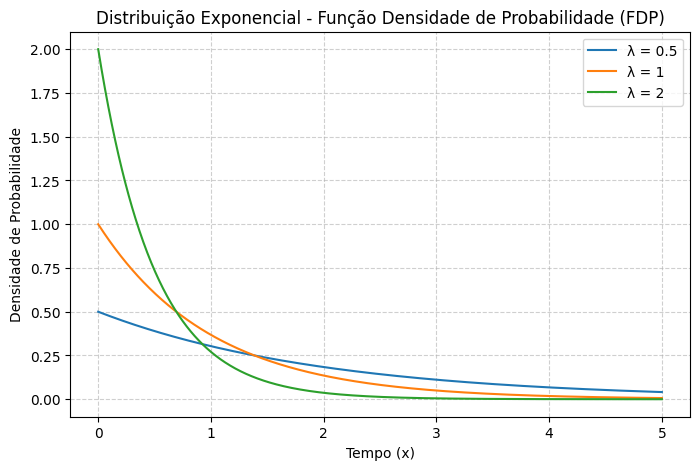

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Valores de lambda (taxa de ocorrência)
lambdas = [0.5, 1, 2]

x = np.linspace(0, 5, 1000)

plt.figure(figsize=(8, 5))
for lambda_ in lambdas:
    pdf = expon.pdf(x, scale=1/lambda_)
    plt.plot(x, pdf, label=f'λ = {lambda_}')

plt.title("Distribuição Exponencial - Função Densidade de Probabilidade (FDP)")
plt.xlabel("Tempo (x)")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


####📈 Função de Distribuição Cumulativa (CDF)

 Função de Distribuição Cumulativa (CDF) da distribuição exponencial é dada por:

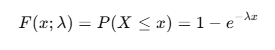

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


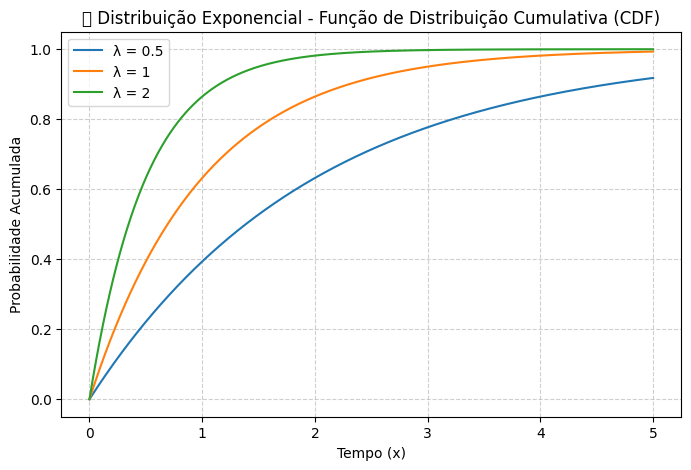

In [ ]:
plt.figure(figsize=(8, 5))
for lambda_ in lambdas:
    cdf = expon.cdf(x, scale=1/lambda_)
    plt.plot(x, cdf, label=f'λ = {lambda_}')

plt.title("📈 Distribuição Exponencial - Função de Distribuição Cumulativa (CDF)")
plt.xlabel("Tempo (x)")
plt.ylabel("Probabilidade Acumulada")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Exemplo**: Vamos supor que o tempo de internação hospitalar siga uma distribuição exponencial com
𝜆
=
0.2 (média de 5 dias).

Pergunta 1: Qual é a probabilidade de um paciente permanecer internado por menos de 3 dias?

In [ ]:
lambda_ = 0.2  # Taxa de 0.2 (média de 5 dias)

# Pergunta 1: Probabilidade de internação < 3 dias (CDF)
prob_menor_3 = expon.cdf(3, scale=1/lambda_)
print(f"✅ Probabilidade de internação < 3 dias: {prob_menor_3:.2%}")

✅ Probabilidade de internação < 3 dias: 45.12%


####🛑 Função de Sobrevivência (SF)

A Função de Sobrevivência (SF) indica a probabilidade de o evento não ter ocorrido até o tempo
𝑥:

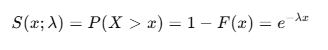

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


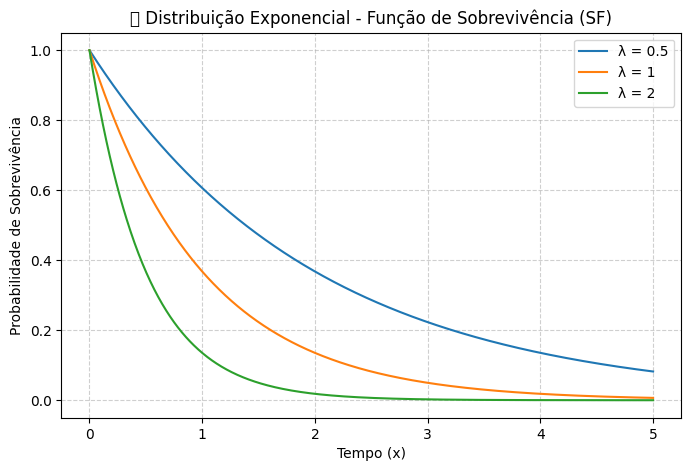

In [ ]:
plt.figure(figsize=(8, 5))
for lambda_ in lambdas:
    sf = expon.sf(x, scale=1/lambda_)
    plt.plot(x, sf, label=f'λ = {lambda_}')

plt.title("🚀 Distribuição Exponencial - Função de Sobrevivência (SF)")
plt.xlabel("Tempo (x)")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Pergunta 2: Qual é a probabilidade de um paciente permanecer internado por mais de 7 dias?

In [ ]:
lambda_ = 0.2  # Taxa de 0.2 (média de 5 dias)

# Pergunta 2: Probabilidade de internação > 7 dias (SF)
prob_maior_7 = expon.sf(7, scale=1/lambda_)

print(f"✅ Probabilidade de internação > 7 dias: {prob_maior_7:.2%}")


✅ Probabilidade de internação > 7 dias: 24.66%


## 🔥 Distribuição Gama

#### 📖 Descrição

A distribuição Gama é uma distribuição contínua usada para modelar tempos de espera e variáveis que representam somas de variáveis exponenciais independentes. É muito útil em modelagem de tempos até eventos, como tempo até a recuperação de um paciente ou tempo até a ocorrência de um surto epidemiológico.

A distribuição Gama possui dois parâmetros:

🔧 Parâmetro de Forma (
α): Também chamado de k, controla a forma da distribuição.

⚙️ Parâmetro de Escala (
θ): Também chamado de β, controla o espalhamento da distribuição.



O parâmetro
α, também chamado de parâmetro de forma ou shape, está relacionado ao formato da distribuição.

Ele define quantas fases ou estágios um evento precisa passar até ocorrer o resultado final.

Na prática, ele pode ser entendido como o número de eventos exponenciais acumulados

Quando
𝛼
=
1, a distribuição Gama se reduz à distribuição exponencial (apenas uma fase).

Quando 𝛼>1, a curva adquire um formato de sino assimétrico, com cauda longa para a direita.

À medida que α aumenta, a distribuição se aproxima de uma distribuição normal (gaussiana)

Exemplo na Saúde:

Se α=1, isso significa que o tempo de internação pode ser descrito como um único evento aleatório (distribuição exponencial).

Se
α=3, significa que a internação do paciente é resultado da soma de 3 eventos exponenciais independentes, como tratamento, observação e estabilização.

O parâmetro
θ, também chamado de parâmetro de escala ou scale, está relacionado ao tamanho ou duração dos eventos individuais.

Representa o tempo médio para cada fase de um processo ou evento.

Valores grandes de
θ tornam a curva mais larga e dispersa.

Valores pequenos de
θ tornam a curva mais estreita e concentrada.

Ele funciona como um fator de escala, ampliando ou comprimindo os valores da variável aleatória.

Exemplo na Saúde:

Se
𝜃
=
2, significa que cada fase do processo de recuperação leva em média 2 dias.

Se
𝜃
=
0.5, cada fase dura em média 0.5 dias (12 horas), ou seja, os eventos são mais rápidos.

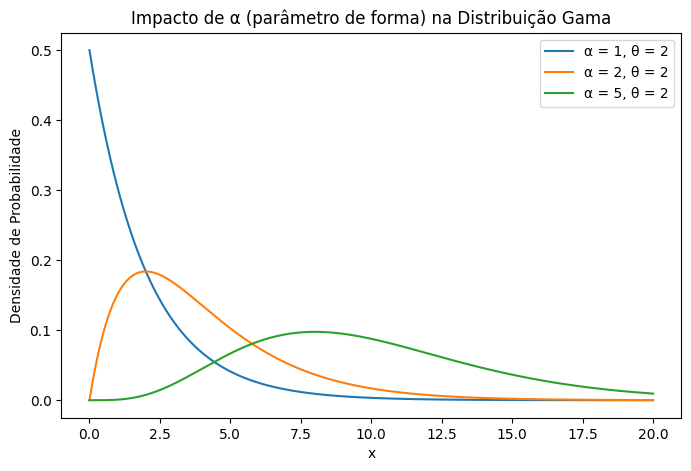

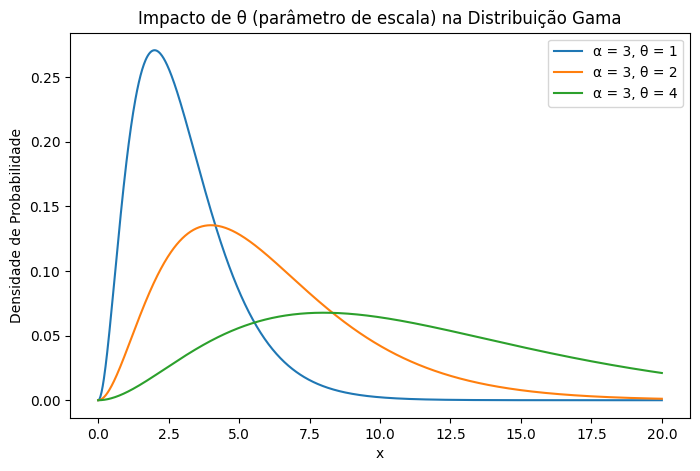

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

x = np.linspace(0, 20, 1000)

# Variação de alfa com theta fixo
plt.figure(figsize=(8, 5))
for alpha in [1, 2, 5]:
    pdf = gamma.pdf(x, alpha, scale=2)
    plt.plot(x, pdf, label=f'α = {alpha}, θ = 2')

plt.title("Impacto de α (parâmetro de forma) na Distribuição Gama")
plt.xlabel("x")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.show()

# Variação de theta com alfa fixo
plt.figure(figsize=(8, 5))
for theta in [1, 2, 4]:
    pdf = gamma.pdf(x, 3, scale=theta)
    plt.plot(x, pdf, label=f'α = 3, θ = {theta}')

plt.title("Impacto de θ (parâmetro de escala) na Distribuição Gama")
plt.xlabel("x")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.show()


####🔢 Função densidade de Probabilidade (FDP)

A Função Densidade de Probabilidade (FDP) da distribuição Gama é dada por:

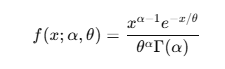

#### 📝 Propriedades da Distribuição Gama

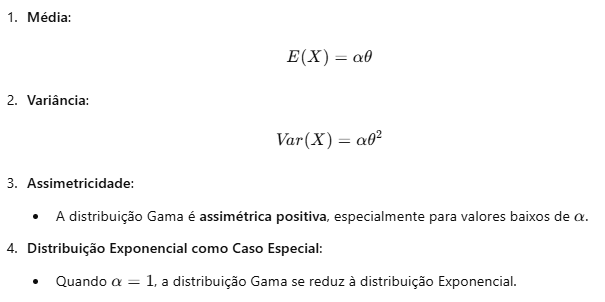

Suponha que o tempo de recuperação de pacientes após uma cirurgia siga uma distribuição Gama com:

𝛼
=
2 (parâmetro de forma)

𝜃
=
3 (parâmetro de escala)

In [ ]:
# Parâmetros da distribuição Gama
alpha = 2  # Parâmetro de forma
theta = 3  # Parâmetro de escala

# Média e Variância
media = gamma.mean(alpha, scale=theta)
variancia = gamma.var(alpha, scale=theta)

# Desvio Padrão
desvio_padrao = gamma.std(alpha, scale=theta)

# Percentil 90% (tempo máximo para 90% dos pacientes se recuperarem)
percentil_90 = gamma.ppf(0.90, alpha, scale=theta)

print(f"📏 Média: {media:.2f} dias")
print(f"📐 Variância: {variancia:.2f} dias²")
print(f"📊 Desvio Padrão: {desvio_padrao:.2f} dias")
print(f"🔎 Percentil 90%: {percentil_90:.2f} dias")


📏 Média: 6.00 dias
📐 Variância: 18.00 dias²
📊 Desvio Padrão: 4.24 dias
🔎 Percentil 90%: 11.67 dias


* Média: A média representa o tempo médio de recuperação

* Variância: A variância indica a dispersão dos tempos de recuperação

* Desvio Padrão: A raiz quadrada da variância representa o desvio médio em torno da média.



* Percentil 90%: Indica que 90% dos pacientes se recuperam em até aproximadamente 10 dias.



#### 📊 Gráfico da Função Densidade de Probabilidade (FDP)

Vamos visualizar a FDP para diferentes valores de
α e
𝜃:

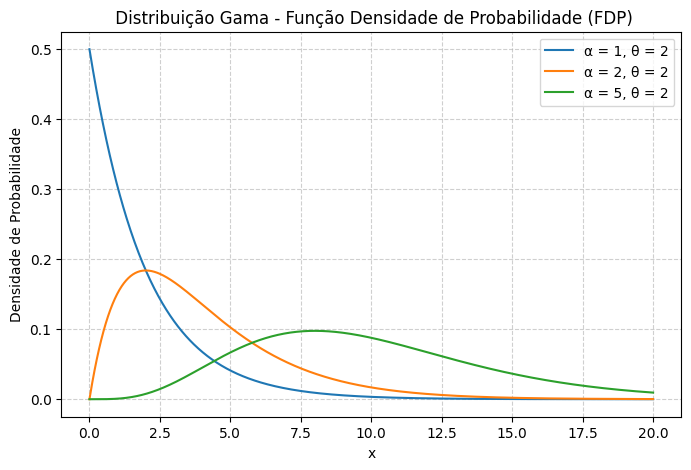

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Valores dos parâmetros
alphas = [1, 2, 5]  # Parâmetros de forma
theta = 2  # Parâmetro de escala
x = np.linspace(0, 20, 1000)

plt.figure(figsize=(8, 5))
for alpha in alphas:
    pdf = gamma.pdf(x, alpha, scale=theta)
    plt.plot(x, pdf, label=f'α = {alpha}, θ = {theta}')

plt.title(" Distribuição Gama - Função Densidade de Probabilidade (FDP)")
plt.xlabel("x")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


####📈 Função de Distribuição Cumulativa (CDF)

A Função de Distribuição Cumulativa (CDF) da distribuição Gama é dada por:

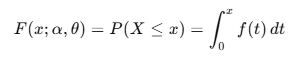

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


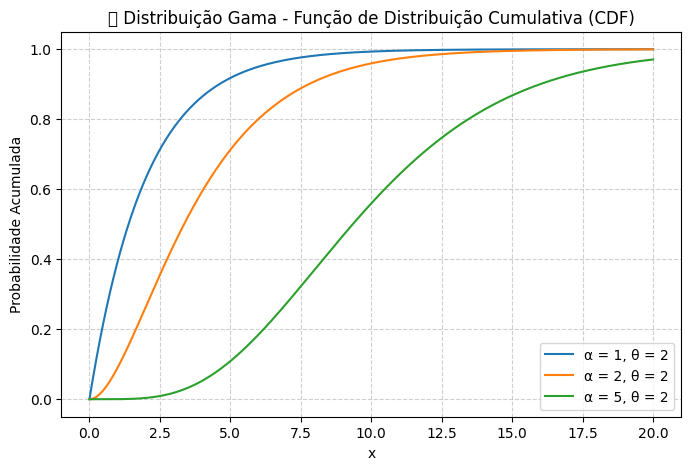

In [ ]:
plt.figure(figsize=(8, 5))
for alpha in alphas:
    cdf = gamma.cdf(x, alpha, scale=theta)
    plt.plot(x, cdf, label=f'α = {alpha}, θ = {theta}')

plt.title("📈 Distribuição Gama - Função de Distribuição Cumulativa (CDF)")
plt.xlabel("x")
plt.ylabel("Probabilidade Acumulada")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


*Exemplo na Saúde*: Tempo de Recuperação após Cirurgia
Suponha que o tempo de recuperação após uma cirurgia siga uma distribuição Gama com:

Parâmetro de Forma (
α) = 3

Parâmetro de Escala (
θ) = 2



Qual é a probabilidade de um paciente se recuperar em até 6 dias?

In [ ]:
import numpy as np
from scipy.stats import gamma

# Parâmetros da distribuição Gama
alpha = 3  # Parâmetro de forma
theta = 2  # Parâmetro de escala

# Valor para cálculo da CDF
x = 6

# Cálculo da CDF
prob_acumulada = gamma.cdf(x, alpha, scale=theta)

print(f"📈 Probabilidade de recuperação em até {x} dias (CDF): {prob_acumulada:.2%}")


📈 Probabilidade de recuperação em até 6 dias (CDF): 57.68%


####🛑 Função de Sobrevivência (SF)

A Função de Sobrevivência (SF) representa a probabilidade de o evento não ter ocorrido até o tempo
x

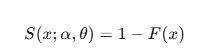

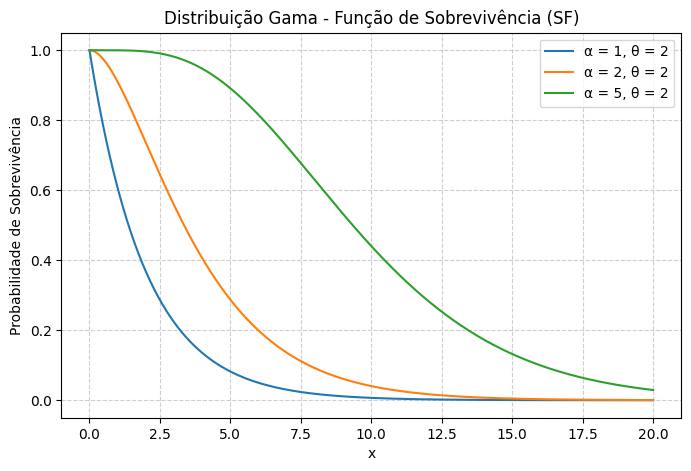

In [ ]:
plt.figure(figsize=(8, 5))
for alpha in alphas:
    sf = gamma.sf(x, alpha, scale=theta)
    plt.plot(x, sf, label=f'α = {alpha}, θ = {theta}')

plt.title("Distribuição Gama - Função de Sobrevivência (SF)")
plt.xlabel("x")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Suponha que o tempo de permanência em uma UTI siga uma distribuição Gama com:

Parâmetro de Forma (
α) = 4

Parâmetro de Escala (
θ) = 1.5

Qual é a probabilidade de um paciente permanecer na UTI por mais de 7 dias?

In [ ]:
# Parâmetros da distribuição Gama
alpha_uti = 4  # Parâmetro de forma
theta_uti = 1.5  # Parâmetro de escala

# Valor para cálculo da SF
x_uti = 7

# Cálculo da SF
prob_sobrevivencia = gamma.sf(x_uti, alpha_uti, scale=theta_uti)

print(f"🚀 Probabilidade de permanência na UTI por mais de {x_uti} dias (SF): {prob_sobrevivencia:.2%}")


🚀 Probabilidade de permanência na UTI por mais de 7 dias (SF): 31.50%


## 🔥 Distribuição Beta

#### 📖 Descrição

A Distribuição Beta é uma distribuição contínua que modela variáveis aleatórias que variam entre 0 e 1.
É amplamente utilizada para modelar proporções, taxas de sucesso e probabilidades em experimentos estatísticos.

####🔢 Função densidade de Probabilidade (FDP)

A distribuição Beta tem dois parâmetros de forma:

* α: Controla o formato da curva no lado esquerdo (peso de sucessos).
* β: Controla o formato da curva no lado direito (peso de falhas).

Ela é bastante flexível, podendo assumir formas simétricas, assimétricas e até multimodais dependendo dos valores de
α e
β.

 Função Densidade de Probabilidade (FDP) da distribuição Beta é dada por:

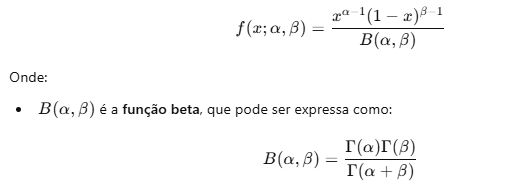

A distribuição Beta é frequentemente utilizada para representar proporções ou probabilidades de sucesso.
Os parâmetros
α e
𝛽 indicam quantas observações de sucesso e falha foram realizadas, respectivamente.

α: Indica o número de sucessos observados ou a intensidade do sucesso.

Quanto maior o valor de
α, mais a curva se desloca para a direita, indicando que os valores altos têm maior probabilidade.

Pode ser interpretado como o número de "vitórias" ou sucessos acumulados.

β: Indica o número de falhas observadas ou a intensidade da falha.

Quanto maior o valor de
β, mais a curva se desloca para a esquerda, indicando que os valores baixos têm maior probabilidade.

Pode ser interpretado como o número de "derrotas" ou falhas acumuladas.



Quando 𝛼 > 𝛽
, a média está mais próxima de 1 (alta chance de sucesso).

Quando
𝛼
<
𝛽
, a média está mais próxima de 0 (baixa chance de sucesso).

Quando
𝛼
=
𝛽
, a distribuição é simétrica em torno de 0,5.

Vamos visualizar como os valores de
𝛼
 e
𝛽
afetam a curva da distribuição Beta:

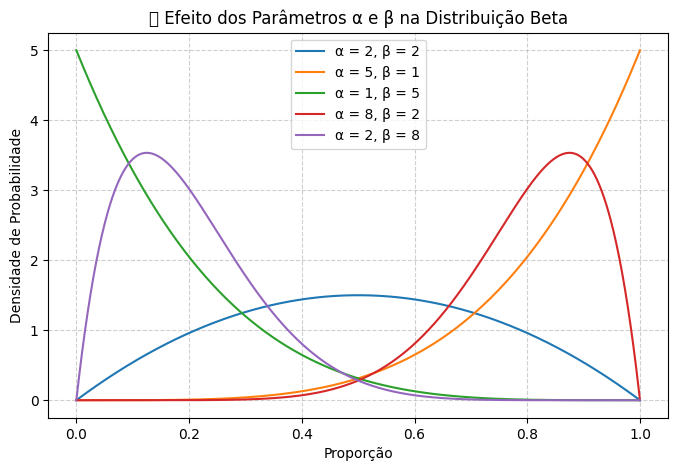

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

x = np.linspace(0, 1, 1000)

# Vários valores de α e β para visualização
parametros = [(2, 2), (5, 1), (1, 5), (8, 2), (2, 8)]

plt.figure(figsize=(8, 5))
for alpha, beta_param in parametros:
    pdf = beta.pdf(x, alpha, beta_param)
    plt.plot(x, pdf, label=f'α = {alpha}, β = {beta_param}')

plt.title("🎯 Efeito dos Parâmetros α e β na Distribuição Beta")
plt.xlabel("Proporção")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### 📝 Propriedades da Distribuição Gama

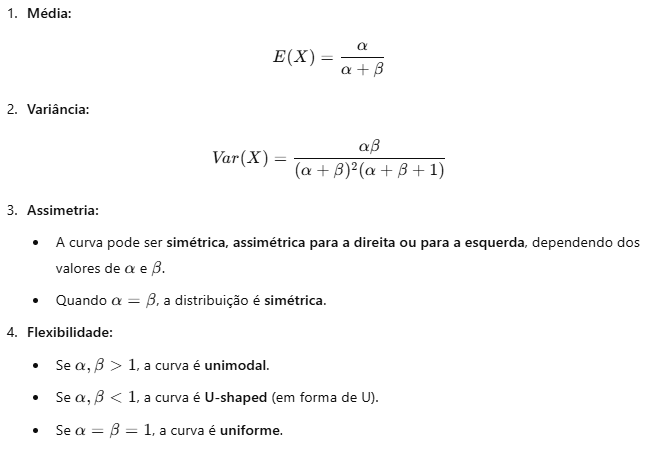

Vamos modelar a probabilidade de eficácia de um tratamento com uma distribuição Beta usando:

α=5 (número de sucessos)

β=3 (número de falhas)

In [ ]:
# Parâmetros da distribuição Beta
alpha = 5  # Sucessos
beta_param = 3  # Falhas

# Média e Variância
media = beta.mean(alpha, beta_param)
variancia = beta.var(alpha, beta_param)

# Percentil 90% (qual a eficácia esperada para 90% dos pacientes?)
percentil_90 = beta.ppf(0.90, alpha, beta_param)

# Geração de amostras aleatórias
amostras = beta.rvs(alpha, beta_param, size=10)

print(f"📏 Média: {media:.2f}")
print(f"📐 Variância: {variancia:.2f}")
print(f"🔎 Percentil 90%: {percentil_90:.2f}")

📏 Média: 0.62
📐 Variância: 0.03
🔎 Percentil 90%: 0.83


* A média representa a eficácia média esperada do tratamento. No exemplo, a média foi de aproximadamente 62,5%.

* Variância: Indica a dispersão dos valores de eficácia em torno da média. Quanto menor a variância, mais consistente é o tratamento.

* Percentil 90: Indica que 90% dos pacientes terão eficácia menor ou igual ao valor calculado.

#### 📊 Gráfico da Função Densidade de Probabilidade (FDP)

Vamos visualizar a FDP para diferentes valores de
α e
β:

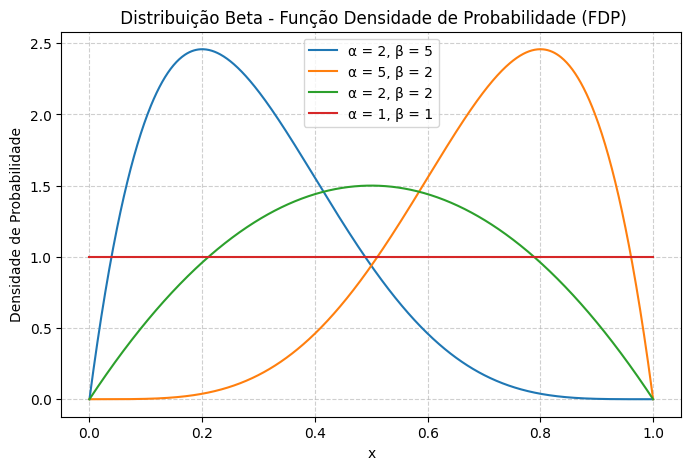

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Valores dos parâmetros
params = [(2, 5), (5, 2), (2, 2), (1, 1)]
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(8, 5))
for alpha, beta_param in params:
    pdf = beta.pdf(x, alpha, beta_param)
    plt.plot(x, pdf, label=f'α = {alpha}, β = {beta_param}')

plt.title(" Distribuição Beta - Função Densidade de Probabilidade (FDP)")
plt.xlabel("x")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


####📈 Função de Distribuição Cumulativa (CDF)

A Função de Distribuição Cumulativa (CDF) da distribuição Beta é dada por:

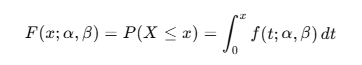

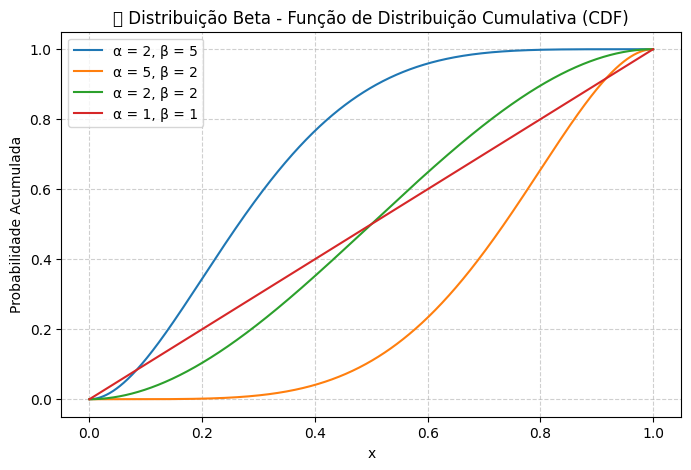

In [ ]:
plt.figure(figsize=(8, 5))
for alpha, beta_param in params:
    cdf = beta.cdf(x, alpha, beta_param)
    plt.plot(x, cdf, label=f'α = {alpha}, β = {beta_param}')

plt.title("📈 Distribuição Beta - Função de Distribuição Cumulativa (CDF)")
plt.xlabel("x")
plt.ylabel("Probabilidade Acumulada")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Suponha que estamos avaliando a taxa de sucesso de um novo tratamento médico.
A eficácia é modelada por uma distribuição Beta com:

𝛼
=
8
 (número de sucessos observados)

𝛽
=
4
 (número de falhas observadas)



Qual é a probabilidade acumulada de o tratamento ter uma eficácia de até 70%?



In [ ]:
import numpy as np
from scipy.stats import beta

# Parâmetros da distribuição Beta
alpha = 8  # Número de sucessos
beta_param = 4  # Número de falhas
x = 0.70  # Eficácia alvo (70%)

# Cálculo da CDF
prob_acumulada = beta.cdf(x, alpha, beta_param)

print(f"📈 Probabilidade acumulada de eficácia ≤ 70% (CDF): {prob_acumulada:.2%}")


📈 Probabilidade acumulada de eficácia ≤ 70% (CDF): 56.96%


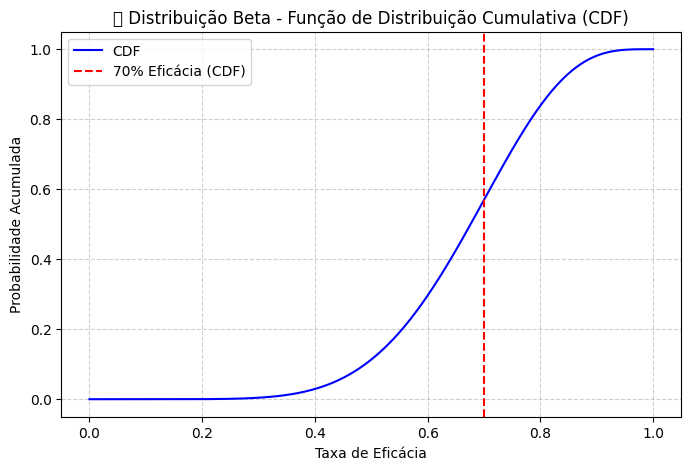

In [ ]:
# Intervalo de eficácia
x_vals = np.linspace(0, 1, 1000)

cdf_vals = beta.cdf(x_vals, alpha, beta_param)

# Plotando a CDF
plt.figure(figsize=(8, 5))
plt.plot(x_vals, cdf_vals, label="CDF", color='blue')
plt.axvline(x, color='red', linestyle='--', label="70% Eficácia (CDF)")
plt.title("📈 Distribuição Beta - Função de Distribuição Cumulativa (CDF)")
plt.xlabel("Taxa de Eficácia")
plt.ylabel("Probabilidade Acumulada")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

####🛑 Função de Sobrevivência (SF)

A Função de Sobrevivência (SF) da distribuição Beta é dada por:

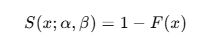

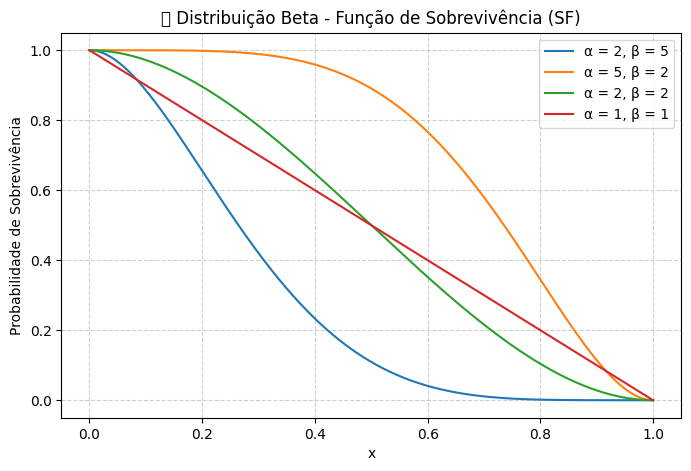

In [ ]:
plt.figure(figsize=(8, 5))
for alpha, beta_param in params:
    sf = beta.sf(x, alpha, beta_param)
    plt.plot(x, sf, label=f'α = {alpha}, β = {beta_param}')

plt.title("🚀 Distribuição Beta - Função de Sobrevivência (SF)")
plt.xlabel("x")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Qual é a probabilidade de o tratamento ter uma eficácia superior a 80%?

In [ ]:
# Valor de eficácia alvo (80%)
x_sf = 0.80

# Cálculo da SF
prob_sobrevivencia = beta.sf(x_sf, alpha, beta_param)

print(f"🚀 Probabilidade de eficácia superior a 80% (SF): {prob_sobrevivencia:.2%}")


🚀 Probabilidade de eficácia superior a 80% (SF): 16.11%


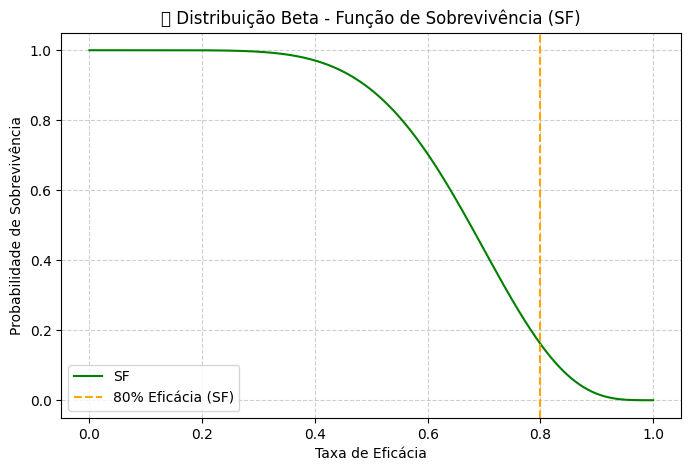

In [ ]:
# Intervalo de eficácia
x_vals = np.linspace(0, 1, 1000)

sf_vals = beta.sf(x_vals, alpha, beta_param)

# Plotando a SF
plt.figure(figsize=(8, 5))
plt.plot(x_vals, sf_vals, label="SF", color='green')
plt.axvline(x_sf, color='orange', linestyle='--', label="80% Eficácia (SF)")
plt.title("🚀 Distribuição Beta - Função de Sobrevivência (SF)")
plt.xlabel("Taxa de Eficácia")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
